In [6]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

from tensorflow.keras import models,layers,optimizers,losses,metrics

# **Word Tokenization**

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat','The dog ate my homework']

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples,mode='binary')
word_index = tokenizer.word_index

print(f"Found {len(word_index)} unique tokens: {word_index}")

Found 9 unique tokens: {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


# **Sequence Processing with conv_nets**

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('LOadinG Data...')
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')

print('Pad sequence (sample x time)')
x_train = sequence.pad_sequences(x_train,max_len)
x_test = sequence.pad_sequences(x_test,max_len)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)

LOadinG Data...
25000 train sequences
25000 test sequences
Pad sequence (sample x time)
x_train shape (25000, 500)
x_test shape (25000, 500)


In [13]:
model = models.Sequential()
model.add(layers.Embedding(max_features,128,input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                

In [15]:
model.compile(
    optimizer=optimizers.RMSprop(lr="1e-4"),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 128,
    validation_split=0.2
)

Epoch 1/20
157/157 [==============================] - 14s 83ms/step - loss: 0.5652 - accuracy: 0.7132 - val_loss: 0.4055 - val_accuracy: 0.8488
Epoch 2/20
157/157 [==============================] - 10s 66ms/step - loss: 0.4035 - accuracy: 0.8719 - val_loss: 0.4440 - val_accuracy: 0.8682
Epoch 3/20
157/157 [==============================] - 7s 47ms/step - loss: 0.3402 - accuracy: 0.9093 - val_loss: 0.4635 - val_accuracy: 0.8742
Epoch 4/20
157/157 [==============================] - 7s 45ms/step - loss: 0.2567 - accuracy: 0.9426 - val_loss: 0.5503 - val_accuracy: 0.8758
Epoch 5/20
157/157 [==============================] - 5s 33ms/step - loss: 0.2180 - accuracy: 0.9569 - val_loss: 0.6208 - val_accuracy: 0.8790
Epoch 6/20
157/157 [==============================] - 6s 36ms/step - loss: 0.1650 - accuracy: 0.9740 - val_loss: 0.7276 - val_accuracy: 0.8764
Epoch 7/20
157/157 [==============================] - 4s 27ms/step - loss: 0.1390 - accuracy: 0.9834 - val_loss: 1.0995 - val_accuracy: 0.85

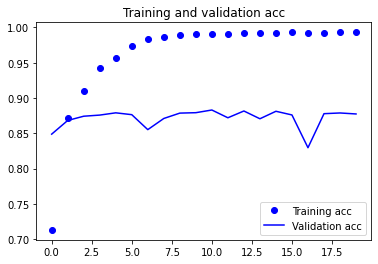

In [18]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epoches = range(len(acc))

plt.plot(epoches,acc,'bo',label='Training acc')
plt.plot(epoches,val_acc,'b',label='Validation acc')
plt.title("Training and validation acc")
plt.legend()

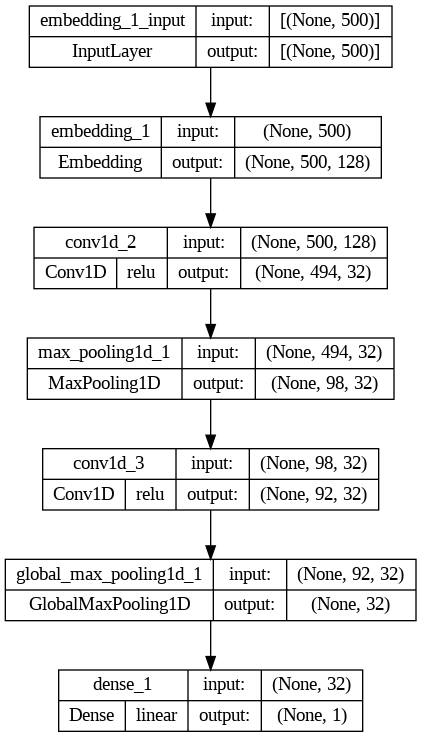

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,show_layer_activations=True,expand_nested=True)

In [31]:
from tensorflow.keras.layers import SimpleRNN

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding ,SimpleRNN

model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________
